In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
keras.__version__

'2.9.0'

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


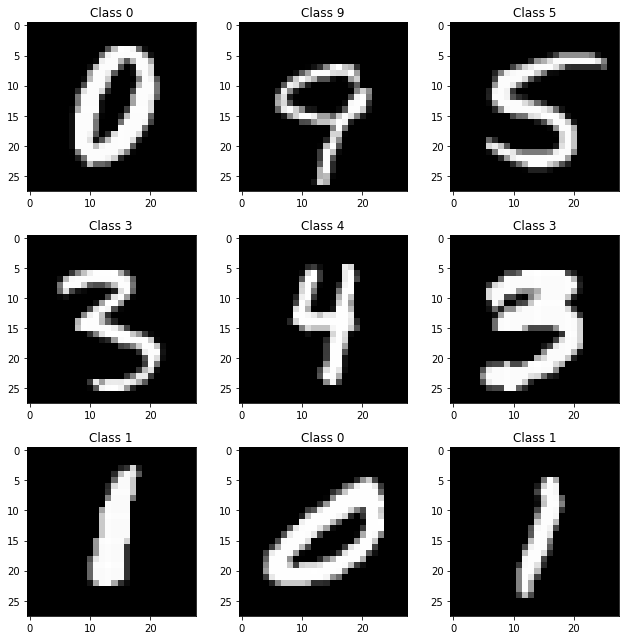

In [ ]:
plt.rcParams["figure.figsize"] = (9,9) #Make the figures a bit bigger

for i in range(9):
  plt.subplot(3,3, i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap = 'gray', interpolation= 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
model = keras.models.Sequential() #un modelo secuencial
model.add(keras.layers.Flatten(input_shape = (28, 28))) #la capa de entrada
#1era capa oculta
model.add(keras.layers.Dense(512, kernel_initializer = 'he_normal')) #1er capa oculta
model.add(keras.layers.LeakyReLU(alpha = 0.2)) #funcion de activacion
#model.add(keras.layers.Dropout(0.2)) #matar neuronas
#2da capa oculta
model.add(keras.layers.Dense(512, activation = 'relu'))
#model.add(keras.layers.Dropout(0.2))
#Capa de salida
model.add(keras.layers.Dense(10, activation = 'softmax')) #recordemos que softmax hace que salidas oscilen entre 0 y 1 (tipo proba)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilar el modelo (funcion de perdida y para optimizar y con que evaluar)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

Implementación de early stopping con una "paciencia de 2 épocas"

In [ ]:
#Implementar Early Stopping añadir un callback
#Monitoreamos val_loss y la condicion de paro es el numero de epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#empezamos a ajustar
#Tras implementar el early stopping tenemos que se frena en la epoch 43
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5546 - accuracy: 0.8611 - val_loss: 0.3019 - val_accuracy: 0.9184
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9191 - val_loss: 0.2411 - val_accuracy: 0.9314
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9332 - val_loss: 0.2072 - val_accuracy: 0.9416
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9422 - val_loss: 0.1843 - val_accuracy: 0.9500
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1790 - accuracy: 0.9490 - val_loss: 0.1675 - val_accuracy: 0.9542
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9539 - val_loss: 0.1539 - val_accuracy: 0.9568
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9595 - val_loss: 0.1410 - val_ac

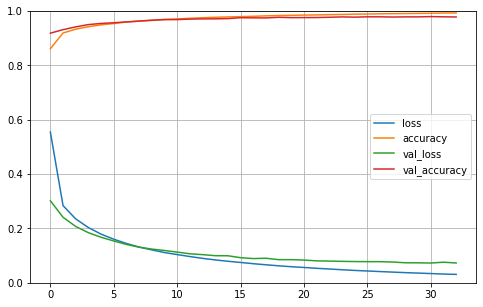

In [ ]:
#Graficar los errores
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

In [ ]:
#evaluar el modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.5676 - accuracy: 0.9737


[13.567625045776367, 0.9736999869346619]

1. **Añadir Early Stopping**

Se añade el early stopping y se revisa el parámetro val_loss. En este caso se hace el early stopping considerando el número de epochs. Se utiliza un parámetro de paciencia de dos. Es decir que si no hay mejora en el error tras dos epochs, se termina el entrenamiento del modelo. En este caso se puede observar de la gráfica y los resultados que el tope es en 43 epochs. En la gráfica de los errores se puede ver que los valores de loss y val_loss comienzan a oscilar y que el accuracy parece llegara a una asíntota. Es decir que el número óptimo de epochs para este modelo es de 40 o 41 dada la paciencia de 2. 

En este caso el loss es de 11.3962 y el accuracy es de 0.9787. Aquí utilizamos el DropOut para evitar sobre ajuste. 

2. **Eliminar el DropOut**

Se elimina la capa de DropOut que va "matando" neuronas, se tiene que ver que pasa con el sobre ajuste. En el caso del early stopping ahora se detiene en la epoch 33, es decir que el óptimo de epochs es entre 30 y 31 teniendo una paciencia de dos. En la gráfica de los errores parece haber una mayor diferencia entre los valores de loss y val_loss. También parece que se comienzan a separar hacia el final de la gráfica los valores de accuracy y val_accuracy. 

Al evaluar el modelo nos da un loss de 13.5676 y un accuracy de 0.9737. 

Al quitar el DropOut el accuracy disminuye de 0.9787 a 9737 y el loss o error aumenta de 11.3962 a 13.5676. Esto quiere decir que el Dropout nos permite optimizar el accuracy y disminuir el error. 

In [ ]:
#hacer predicciones
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):

  predictions_array, true_label, img = predictions_array, true_label[i], img[i]

  plt.grid(False)

  plt.xticks([])

  plt.yticks([])

 

  plt.imshow(img, cmap=plt.cm.binary)

 

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:

    color = 'blue'

  else:

    color = 'red'

 

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],

                                100*np.max(predictions_array),

                                class_names[true_label]),

                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):

  predictions_array, true_label = predictions_array, true_label[i]

  plt.grid(False)

  plt.xticks(range(10))

  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")

  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)

 

  thisplot[predicted_label].set_color('red')

  thisplot[true_label].set_color('blue')

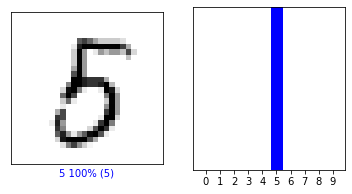

In [ ]:
i = 45

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)

plot_image(i, predictions[i], y_test, X_test)

plt.subplot(1,2,2)

plot_value_array(i, predictions[i],  y_test)

plt.show()